In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The main question we look to answer in this project is **"How has the maximum daily temperature evolved over time?"** To do this, we will look to how the location, time of year, and other weather factors like percipitation and snow affect the maximum temperature observed in Denver, CO.

In [2]:
# file path
fname = "../Project1/merged_data/denver_weather_train.csv"

# load the data
df = pd.read_csv(fname)

# store "DATE" column as datetime object
df["DATE"] = pd.to_datetime(df["DATE"])

# set primary key to DATE and NAME
df.set_index(["DATE", "STATION"], inplace=True)

df.head()

YEAR  MONTH  DAY  AWND  PRCP  TMAX  TMIN   WDF2   WDF5  \
DATE       STATION                                                           
2005-01-01 0        2005      1    1  7.61   0.0  51.0  22.0  260.0  250.0   
           1        2005      1    1  7.61   0.0  58.0  21.0  260.0  250.0   
           3        2005      1    1  7.61   0.0  28.0  20.0  260.0  250.0   
2005-01-02 0        2005      1    2  5.14   0.0  34.0  21.0  160.0  160.0   
           1        2005      1    2  5.14   0.0  45.0  19.0  160.0  160.0   

                    WSF2  WSF5  TARGET  SNOW  SNWD  
DATE       STATION                                  
2005-01-01 0        21.0  29.1    34.0   0.0   0.0  
           1        21.0  29.1    45.0   0.0   0.0  
           3        21.0  29.1    45.0   0.0   0.0  
2005-01-02 0        14.1  15.0    49.0   0.0   0.0  
           1        14.1  15.0    32.0   0.0   0.0

### First let's explore the temperature around Denver, CO as a function of time (years). We will use 12 line plots (one for each month) to show the evolution of the average maximum daily temperature in each month.

In [3]:
# define the station names
# 0 = "Denver Centennial Airport"
# 1 = "Central Park" 
# 2 = "Denver International Airport" 
# 3 = "Denver Water Department"
station_names = ["Denver Centennial Airport",
                 "Central Park",
                 "Denver International Airport",
                 "Denver Water Department"]

# months
months = ["January",
          "February",
          "March",
          "April",
          "May",
          "June",
          "July",
          "August",
          "September",
          "October",
          "November",
          "December"]

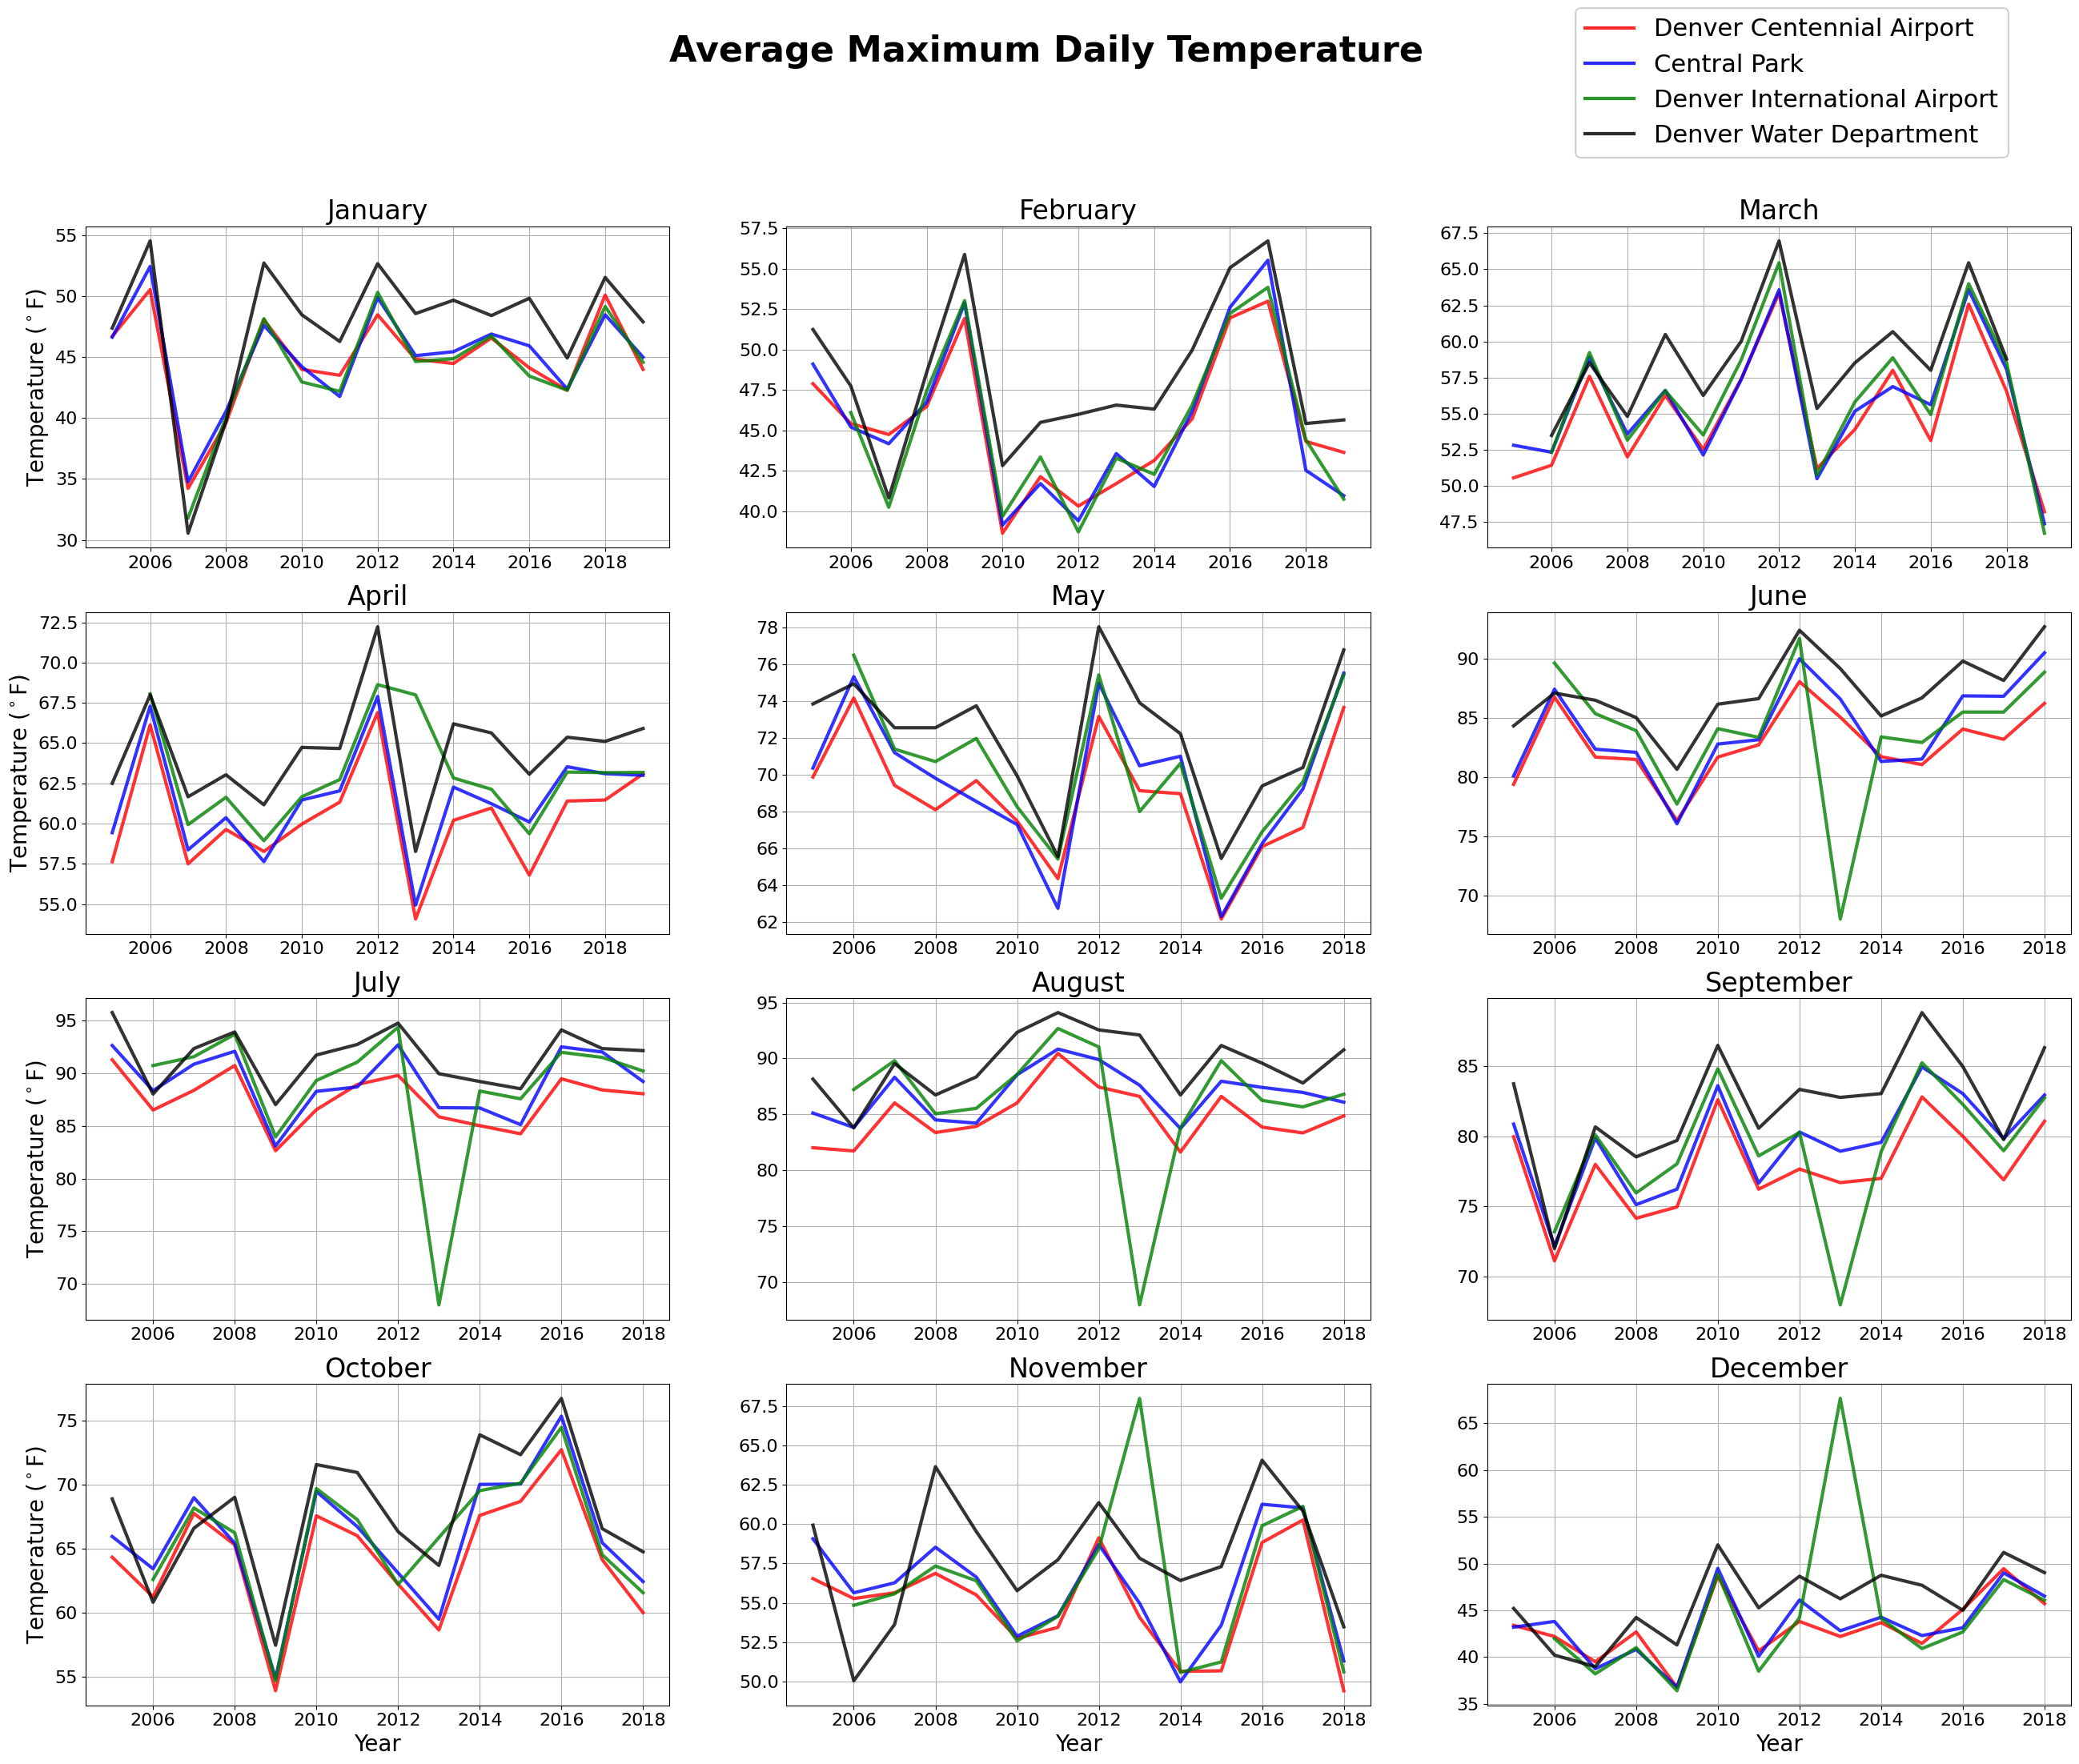

In [4]:
# line colors for each station
colors = ['r', 'b', 'g', 'k']

fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(32,24))

fig.suptitle("Average Maximum Daily Temperature", fontsize=32, fontweight='bold')

# each plot represents the evolution of the average maximum daily temperature for a particular month
for m in range(len(months)):
  # set title and grid for each month's plot
  ax[m//3, m%3].set_title(f'{months[m]}', fontsize=24)
  ax[m//3, m%3].grid()

  # filter data by current month
  df_month = df[df["MONTH"]==m+1]


  for s in range(len(station_names)):

    # group the entries by name of station and year for the current month
    df_month = df_month.groupby(["STATION", "YEAR"]).mean(numeric_only=True)

    # plot the average of daily maximums observed by each station
    # label each line with the corresponding station name
    ax[m//3, m%3].plot(df_month.xs(key=s, level="STATION")["TMAX"],
                       label=station_names[s],
                       color=colors[s],
                       linewidth=3,
                       alpha=0.8)
    # adjust tick size
    ax[m//3, m%3].tick_params(axis='both', which='major', labelsize=16)

  # insert legend
  handles, labels = ax[0,0].get_legend_handles_labels()
  fig.legend(handles, labels, bbox_to_anchor=(0.88,1), fontsize=22)


# label axes
ax[0,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=20)
ax[1,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=20)
ax[2,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=20)
ax[3,0].set_ylabel(r'Temperature ($^\circ$F)', fontsize=20)

ax[-1,0].set_xlabel('Year', fontsize=20)
ax[-1,1].set_xlabel('Year', fontsize=20)
ax[-1,2].set_xlabel('Year', fontsize=20)

plt.show()

### We will create two functions to help make plotting a bit less repetitive. `plot_stations()` will create a line plot of the given data for the specified stations. `scatter_stations()` will create a 2D scatter plot for the two input features for each station specified.

In [5]:
def plot_stations(data: pd.Series,
                  stations: list,
                  colors: list,
                  feature: str | None,
                  title: str,
                  xlab: str,
                  ylab: str,
                  alpha: float=1,
                  linewidth: float=1):
    """
    Plots feature for each station on the same plot
    figure size is (16,12)
    """

    # initialize the figure
    fig = plt.figure(figsize=(16,12))

    for s in range(len(stations)):
        # define the current station's name
        station_name = stations[s]

        # plot the data
        plt.plot(data.xs(key=s, level="STATION"),
                 color=colors[s],
                 label=station_name,
                 linewidth=linewidth,
                 alpha=alpha)
        
    # insert legend and grid
    plt.legend(fontsize=18)
    plt.grid()

    # label title and axes
    plt.title(title, fontsize=32, fontweight='bold')
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)

    # prevent figure from displaying when the function is called
    plt.close()
    return fig

def scatter_stations(data: pd.DataFrame,
                     stations: list,
                     colors: list,
                     feature_x: str,
                     feature_y: str,
                     title: str,
                     xlab: str,
                     ylab: str,
                     alpha: float=1,
                     marker_size: float=20):
    """
    Generates scatterplot of features for each station on the same plot
    figure size is (16,12)
    """

    # initialize the figure
    fig = plt.figure(figsize=(16,12))


    
    for s in range(len(stations)):
        # define the current station's name
        station_name = stations[s]

        # plot the data
        plt.scatter(data.xs(key=s, level="STATION")[feature_x],
                    data.xs(key=s, level="STATION")[feature_y],
                    color=colors[s],
                    label=station_name,
                    s=marker_size,
                    alpha=alpha)
        

    # insert legend and grid
    plt.legend(fontsize=18)
    plt.grid()

    # label axes and title
    plt.title(title, fontsize=32, fontweight='bold')
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)

    # prevent figure from displaying when the function is called
    plt.close()
    return fig

### On average, it seems like the Denver Water Department has the highest daily maximum while Denver Centennial Airport has the lowest daily highs. Although there isn't a clear trend up or down throughout the years, we do see that each month has a particular range that it likes to stay within. Let's see the evolution of TMAX for one particular year, 2016.

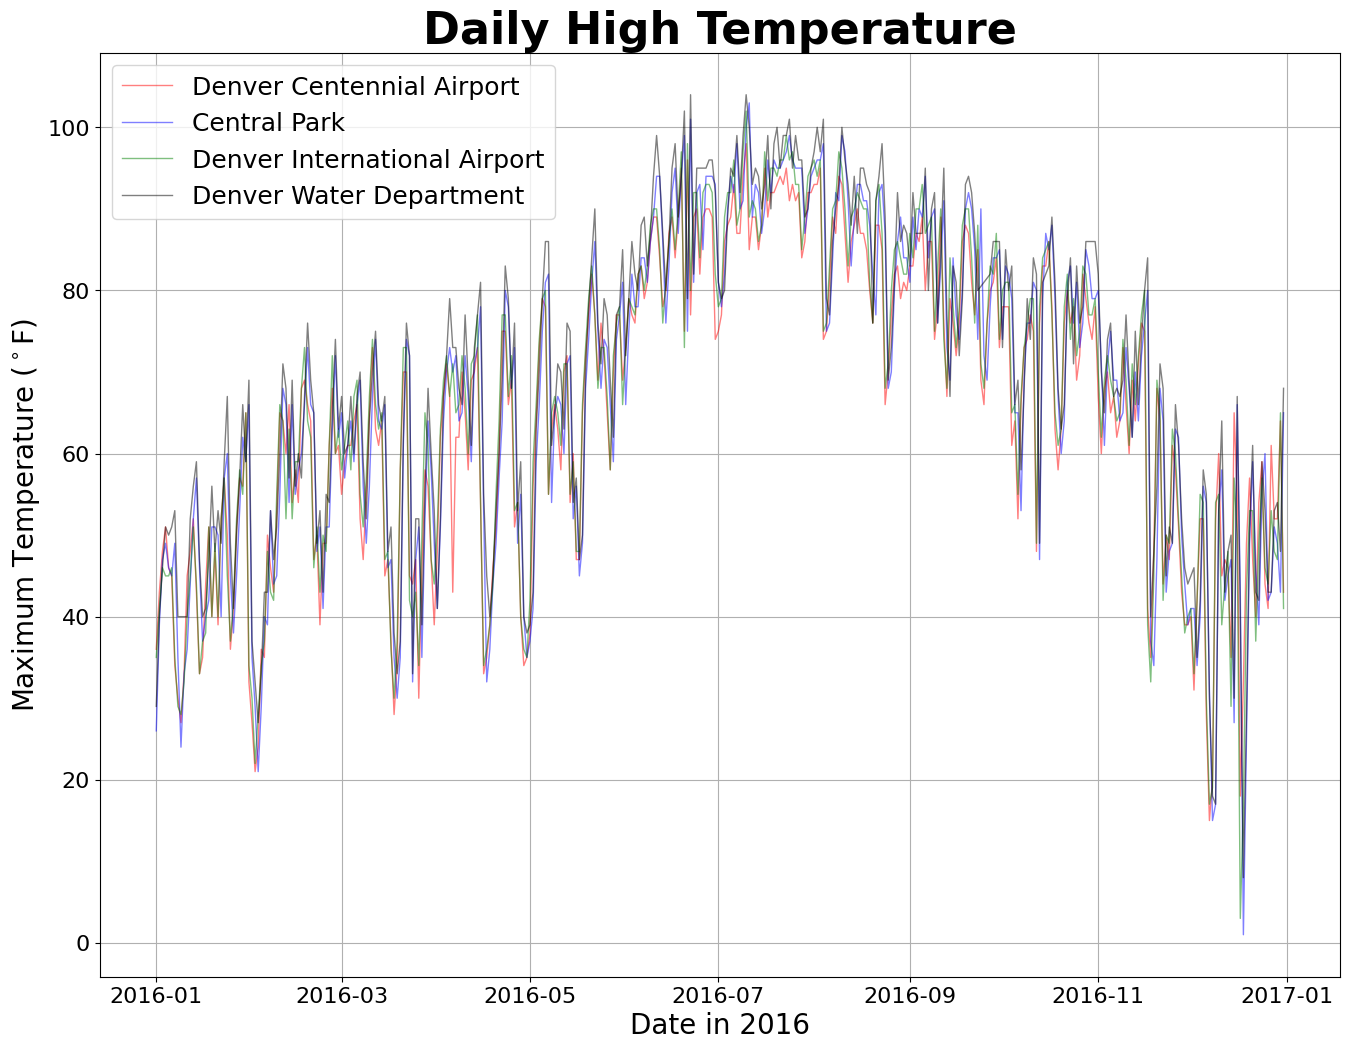

In [6]:
# filter data by year 2016
df_2016 = df[df["YEAR"] == 2016]

max_temp_2016 = plot_stations(df_2016["TMAX"],
                              station_names,
                              colors,
                              "TMAX", 
                              "Daily High Temperature",
                              "Date in 2016",
                              r'Maximum Temperature ($^\circ$F)',
                              0.5)

max_temp_2016

### The weather dynamics are chaotic as shown in the plot. However, we do see some temporal patterns. The weather will generally be the lowest in November and December, and gradually rise until it reaches its peak between June and July.

### Next let's find out how the frequency of extreme heat events (temperatures $\geq90^\circ\text{F}$) have evolved in each of the four locations.

### Note that we exclude 2019 from our plot because we only have data for the first quarter of the year. This will ensure that we don't see a significant drop in the number of extreme heat events observed between 2018 and 2019. We keep 2006 in the case of Denver International Airport despite not having the full data for that year because our observations begin in February. It is unlikely that temperatures above $90^\circ$F were observed at the beginning of the year.

In [7]:
# filter data by TMAX >= 90
df_extreme = df[df["TMAX"] >= 90]

# exclude 2019 since we don't have full data for this year
df_extreme = df_extreme[df_extreme["YEAR"] != 2019]

# group by location and year
# count number of extreme heat events
df_extreme = df_extreme.groupby(["STATION", "YEAR"])["TMAX"].count()

# count number of values
df_etreme = df_extreme.rename("Number of Extreme Heat Events")
df_extreme.head()

STATION  YEAR
0        2005    25
         2006    29
         2007    26
         2008    33
         2009    13
Name: TMAX, dtype: int64

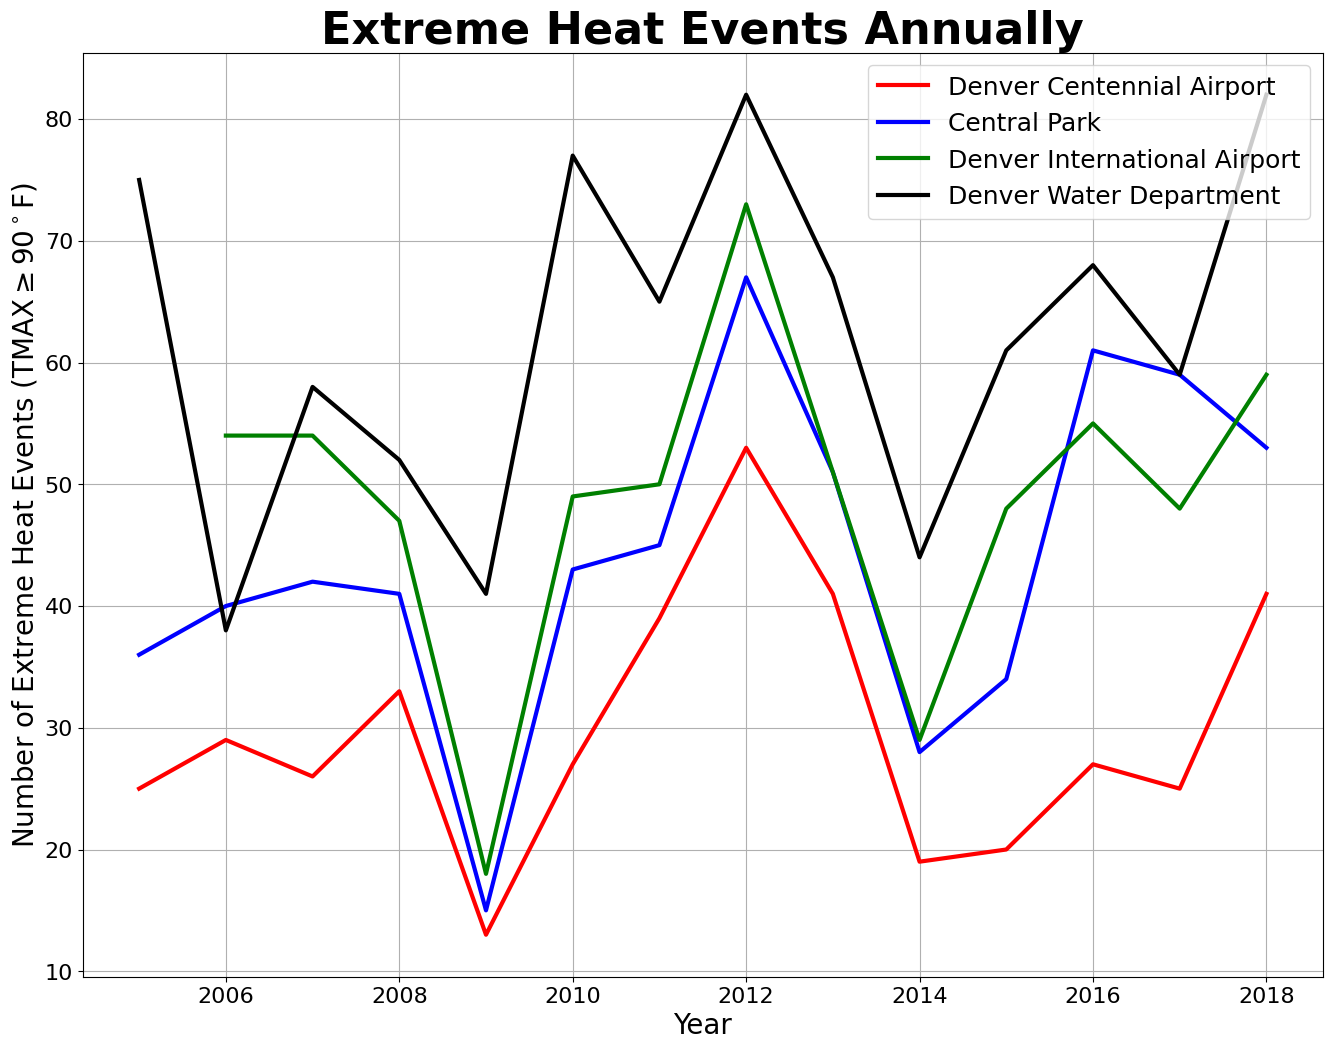

In [8]:
extreme_temps = plot_stations(df_extreme,
                              station_names,
                              colors,
                              None,
                              "Extreme Heat Events Annually",
                              "Year",
                              r'Number of Extreme Heat Events (TMAX$\geq90^\circ$F)',
                              linewidth=3)

extreme_temps

### This plot seems to confirm our hypothesis that the water department and the Centennial Airport are have the highest and lowest temperatures on average. The water department consistently has higher number of extreme heat days while the Centennial Airport consistently has a lower number of extreme heat days compared to the other locations.

### Interestingly, there seems to have been a steady rise in the frequency of extreme heat events in all four locations starting in 2014.

### Next we explore the relationship between the minimum and maximum temperature. Let's make a scatter plot with maximum temperature on the vertical and minimum temperature on the horizontal axis. We expect to see a strong correlation between the two.

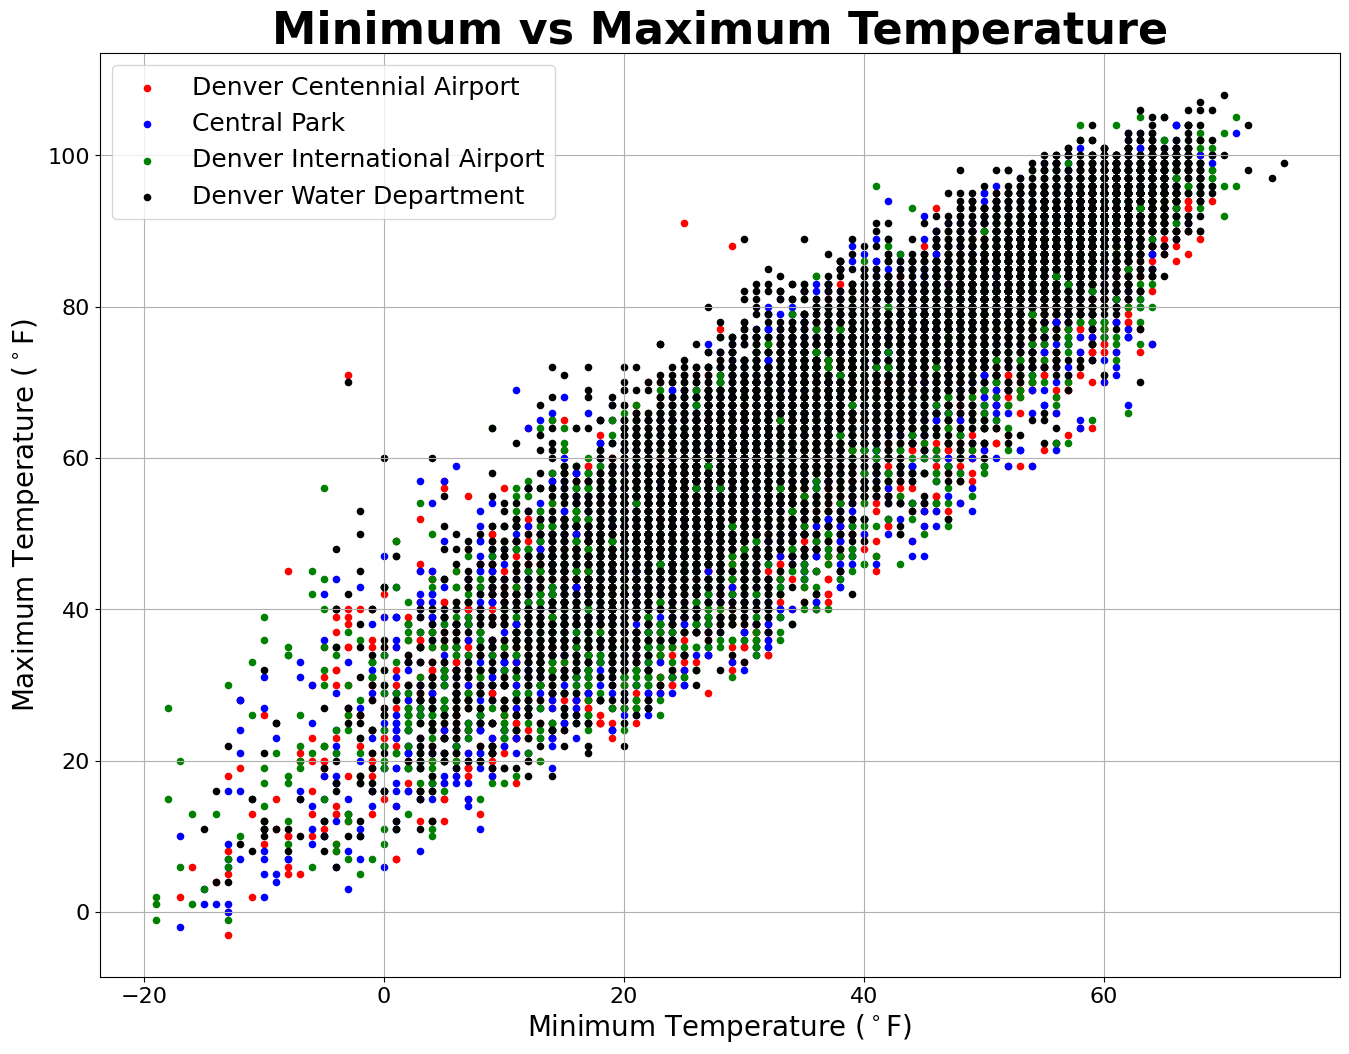

In [9]:
min_max_temps = scatter_stations(df,
                                 station_names,
                                 colors,
                                 "TMIN",
                                 "TMAX",
                                 "Minimum vs Maximum Temperature",
                                 r'Minimum Temperature ($^\circ$F)',
                                 r'Maximum Temperature ($^\circ$F)')

min_max_temps

### As we expect, there is a clear relationship between the minimum and maximum temperature. In general, we the minimum temperature increases, the maximum will also increase.



### We can also explore how the previous day's high is related to the current day's high.

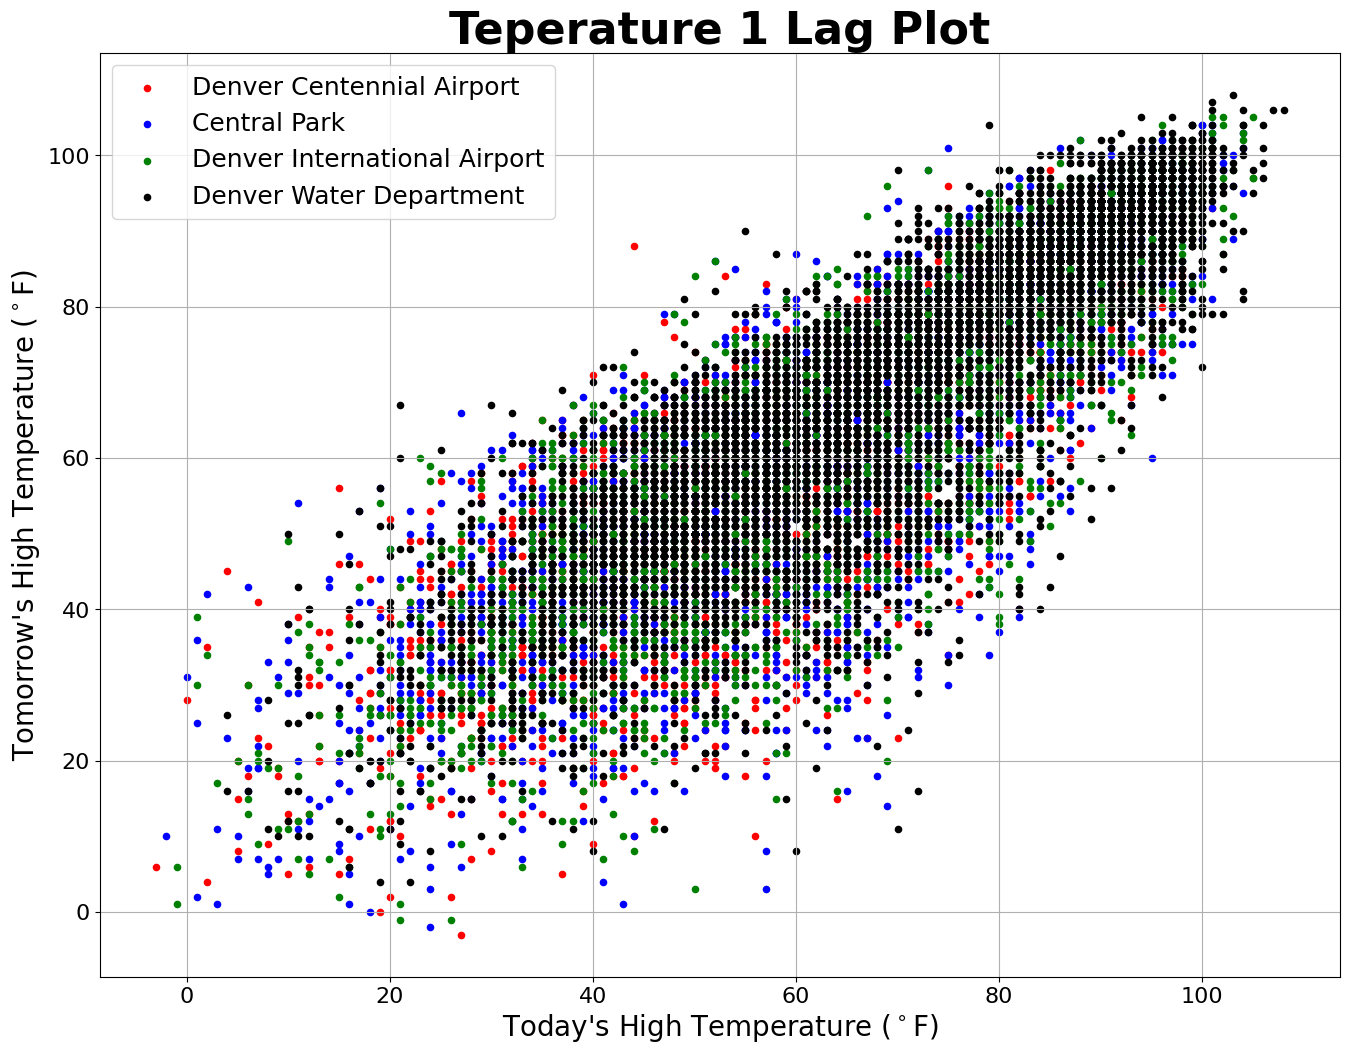

In [24]:
autocorrelation = scatter_stations(df,
                                   station_names,
                                   colors,
                                   "TMAX",
                                   "TARGET",
                                   "Teperature 1 Lag Plot",
                                   r"Today's High Temperature ($^\circ$F)",
                                   r"Tomorrow's High Temperature ($^\circ$F)")

autocorrelation

### Again, we see a clear relationship between the previour and current high. This is to be expected since weather is seasonal and doesn't fluctuate dramatically within short periods of time.

### Next we will explore how wind speeds affect the maximum temperature. We should expect that higher wind speeds would result in lower temperatures and vice versa. Let's create a similar plot to the one above, this time with average wind speed on the horizontal axis.

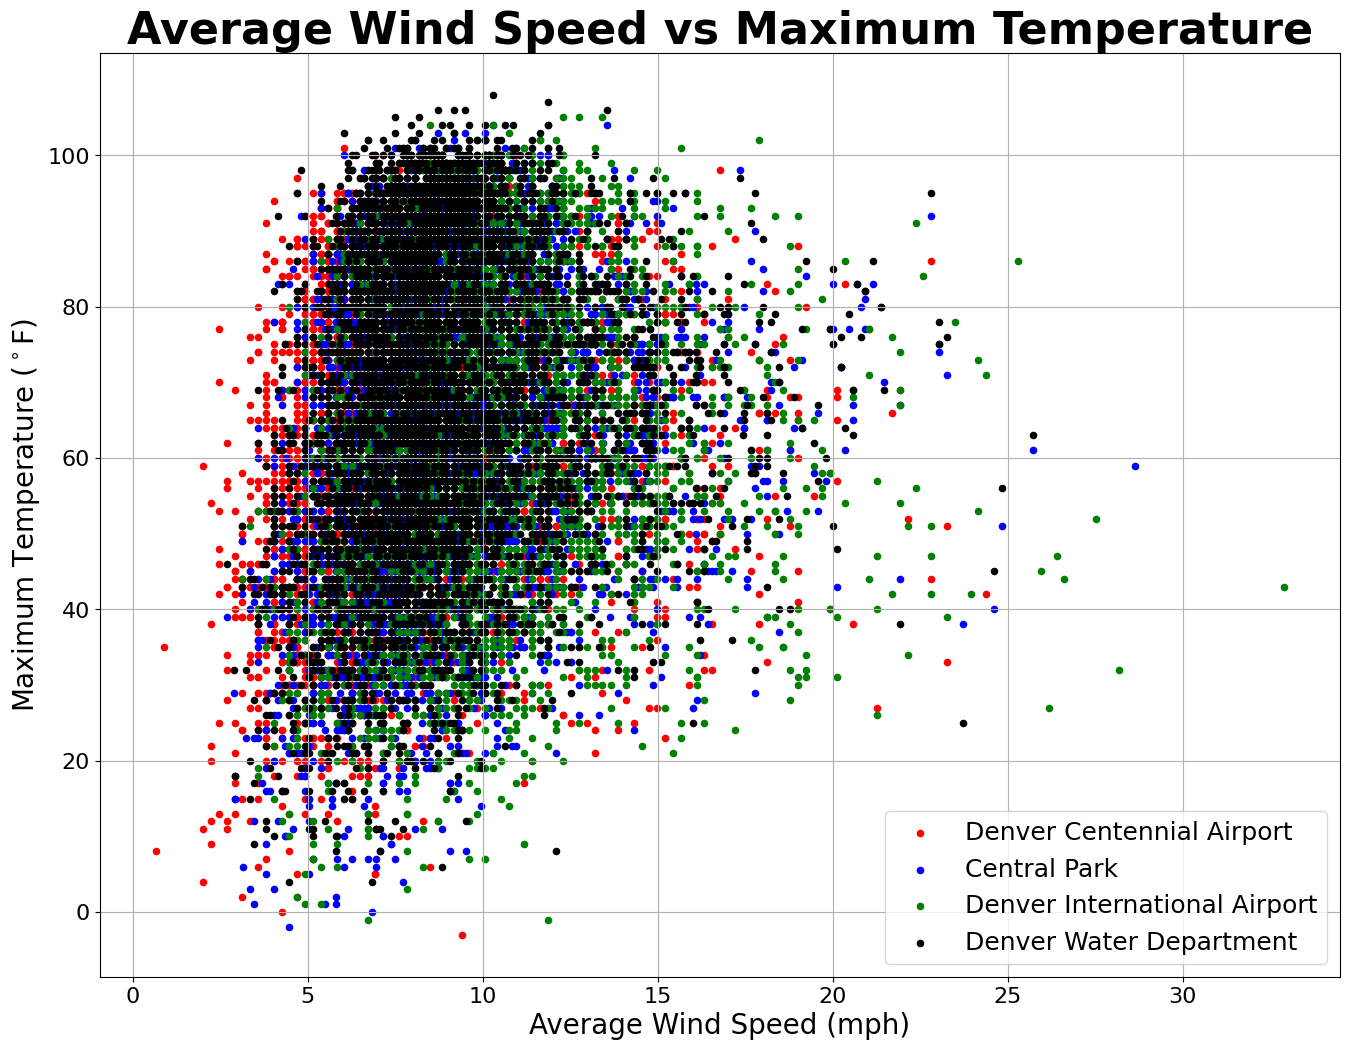

In [11]:
wind_temp = scatter_stations(df,
                             station_names,
                             colors,
                             "AWND",
                             "TMAX",
                             "Average Wind Speed vs Maximum Temperature",
                             "Average Wind Speed (mph)",
                             r'Maximum Temperature ($^\circ$F)')

wind_temp

### Here we don't quite see as strong of a relationship as we anticipated. Perhaps wind speeds play a much smaller role in determining the maximum temperature for any given day.

### Finally, we can explore the relationship between snowfall and maximum temperature. We expect to see that as snowfall decreases, the maximum temperature decreases until snowfall is 0. At that point we expect to see no relation.

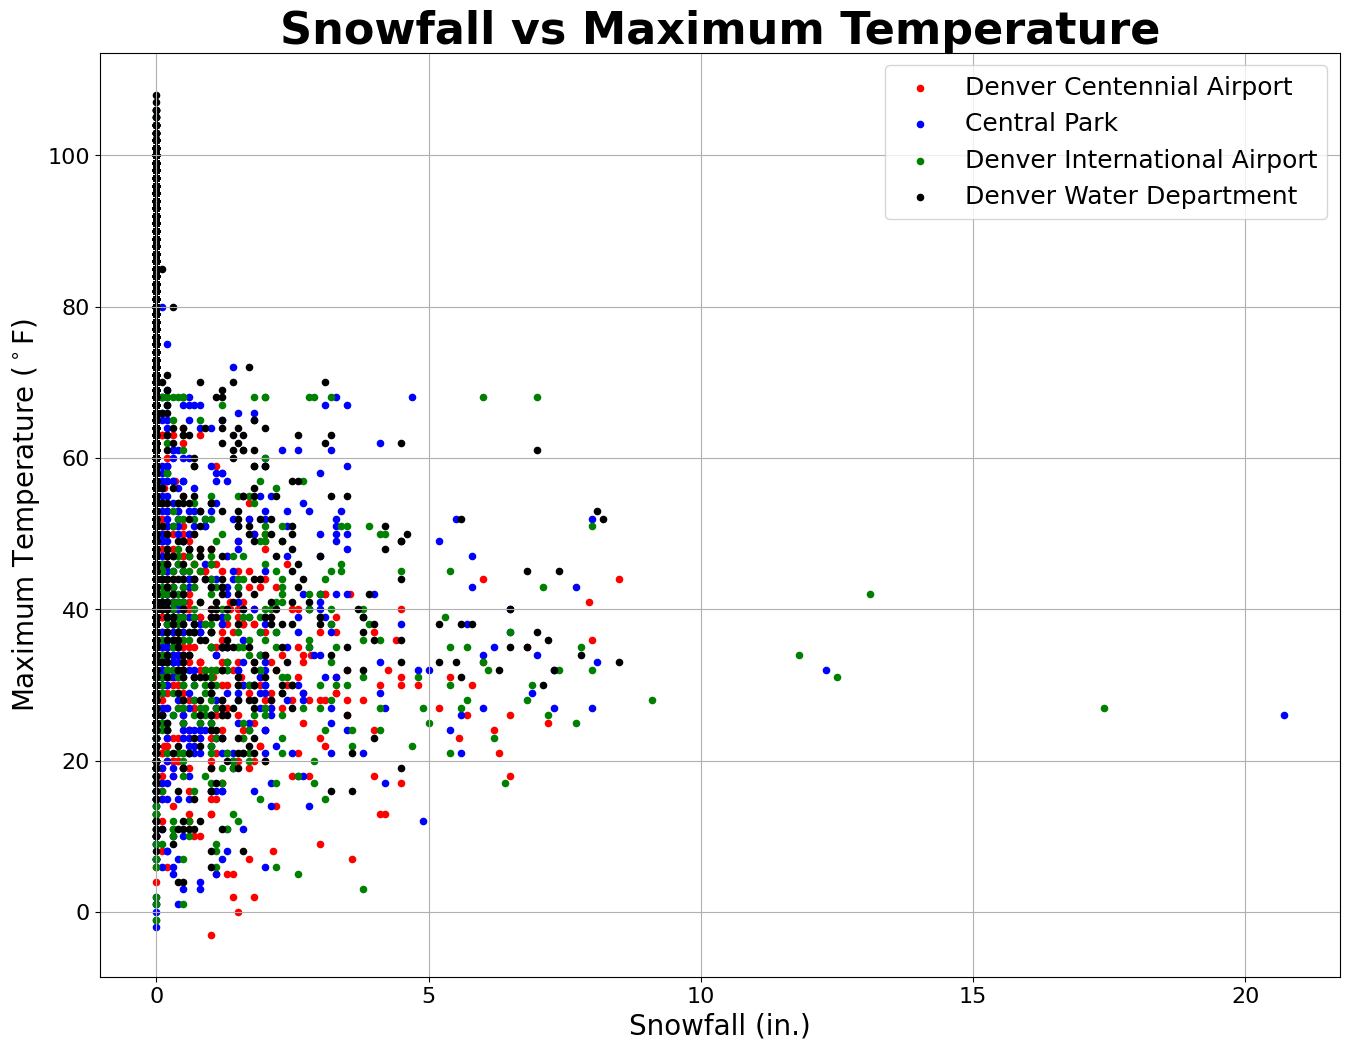

In [12]:
snow_temp = scatter_stations(df,
                             station_names,
                             colors,
                             "SNOW",
                             "TMAX",
                             "Snowfall vs Maximum Temperature",
                             "Snowfall (in.)",
                             r'Maximum Temperature ($^\circ$F)')

snow_temp

### There doesn't seem to be as strong of a relationship between snowfall and temperature as initially thought. We expected to see a curve proportional to $e^{-x}$ but the plot doesn't quite ressemble this. Perhaps the relationship between the two variables is weaker than we thought. However, we do not see a trend in the temperature with respect to the year.

In [13]:
df.loc[:,~df.columns.isin(["YEAR", "MONTH", "DAY"])]

AWND  PRCP  TMAX  TMIN   WDF2   WDF5   WSF2   WSF5  \
DATE       STATION                                                         
2005-01-01 0         7.610  0.00  51.0  22.0  260.0  250.0  21.00  29.10   
           1         7.610  0.00  58.0  21.0  260.0  250.0  21.00  29.10   
           3         7.610  0.00  28.0  20.0  260.0  250.0  21.00  29.10   
2005-01-02 0         5.140  0.00  34.0  21.0  160.0  160.0  14.10  15.00   
           1         5.140  0.00  45.0  19.0  160.0  160.0  14.10  15.00   
...                    ...   ...   ...   ...    ...    ...    ...    ...   
2019-04-10 2        18.570  0.15  56.0  17.0  350.0  360.0  32.00  40.90   
2019-04-11 2         8.950  0.05  35.0  17.0   10.0  360.0  23.00  30.00   
           1         7.605  0.39  42.0  17.0   10.0  195.0  21.45  28.55   
           3         7.605  0.49  43.0  19.0   10.0  195.0  21.45  28.55   
           0         6.260  0.01  40.0  16.0   10.0   30.0  19.90  27.10   

                    TARGET  SNOW  SNWD  
DATE       STATION                      
2005-01-01 0          34.0   0.0   0.0  
           1          45.0   0.0   0.0  
           3          45.0   0.0   0.0  
2005-01-02 0          49.0   0.0   0.0  
           1          32.0   0.0   0.0  
...                    ...   ...   ...  
2019-04-10 2          35.0   2.2   0.0  
2019-04-11 2          41.0   0.3   3.1  
           1          41.0   3.3   2.0  
           3          43.0   2.6   2.0  
           0          44.0   2.6   2.0  

[20293 rows x 11 columns]

### For our modeling in [Project 3](https://github.com/kennethwirjadisastra/Stat155/tree/main/Project3), we will be focusing on data collected at Centennial Airport. Let's visualize the correlation matrix for this dataset using a heatmap.

In [11]:
df_APA = pd.read_csv("../Project1/train_data/APA_weather_train.csv")

# concatenate training and validation datasets
df_APA = pd.concat([df_APA, pd.read_csv("../Project1/validation_data/APA_weather_validation.csv")], axis=0)
df_APA["DATE"] = pd.to_datetime(df_APA["DATE"])
df_APA.set_index("DATE", inplace=True)
df_APA.drop(columns=["STATION", "NAME"], inplace=True)


# move TARGET to the begining of columns
columns = list(df_APA.columns)
columns.insert(0, columns.pop(columns.index('TARGET')))
df_APA = df_APA[columns]
df_APA.head()

,TARGET,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,
2005-01-01,34.0,7.61,0.0,51.0,22.0,260.0,250.0,21.0,29.1
2005-01-02,49.0,5.14,0.0,34.0,21.0,160.0,160.0,14.1,15.0
2005-01-03,28.0,4.47,0.0,49.0,17.0,50.0,50.0,14.1,16.1
2005-01-04,7.0,7.16,0.0,28.0,6.0,340.0,340.0,19.9,21.0
2005-01-05,41.0,3.80,0.0,7.0,1.0,10.0,20.0,8.9,10.1


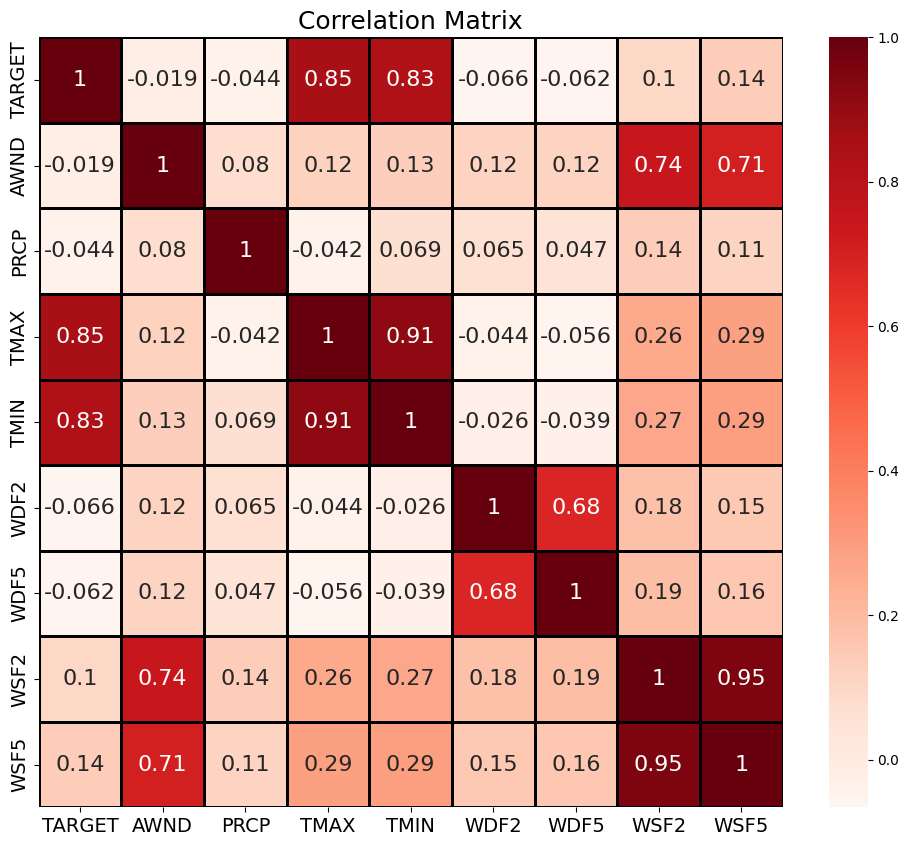

In [21]:
corr_matrix = df_APA.corr()

fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, cmap='Reds', 
            linecolor='black', linewidths=2, annot_kws={"fontsize":16}, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

### Given one lag, the target is influenced mostly by the previous day's temperatures (both maximum and minimum). However, we see that the maximum and minimum temperatures for a given day are also very highly correlated, therefore it is likely redundant to include both as factors for our model to consider. Therefore we will use only previous values of `TMAX` to determine the next day's maximum temperature.

### So we have established that the previous day's maximum is the variable that has the greatest influence on the target variable, the current day's maximum. We also find a relationship between the temperature and the month of the year. This information will be useful to us when constructing the model in future projects.